In [8]:
import os
import numpy as np
import dxchange

import torch as tc
# tc.set_default_tensor_type(tc.DoubleTensor)
tc.set_default_tensor_type(tc.FloatTensor)
tc.pi = tc.acos(tc.zeros(1)).item() * 2
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import rotate as sp_rotate

from tqdm import tqdm
from scipy.ndimage import rotate as sp_rotate
import xraylib as xlib
import xraylib_np as xlib_np
import time

In [9]:
from data_generation_fns import create_XRF_data

In [11]:
data = np.load('./data/sample3_data/XRF_sample3_test.npy').astype(np.float32)
# data = np.load('./data/sample3_data/XRF_sample3.npy')
print(data.shape)

data = tc.from_numpy(np.transpose(data, axes=(0,2,1)))
print(data.dtype)

(4, 5, 8)
torch.float32


tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9793e+00, 0.0000e+00],
        [0.0000e+00, 3.1872e-07, 1.0356e-01, 1.8626e+00, 5.4948e-01],
        [0.0000e+00, 9.9912e-22, 3.6906e-01, 1.3165e+00, 6.8174e-01],
        [0.0000e+00, 2.8894e-23, 9.3058e-01, 2.0722e+00, 6.5385e-01]])


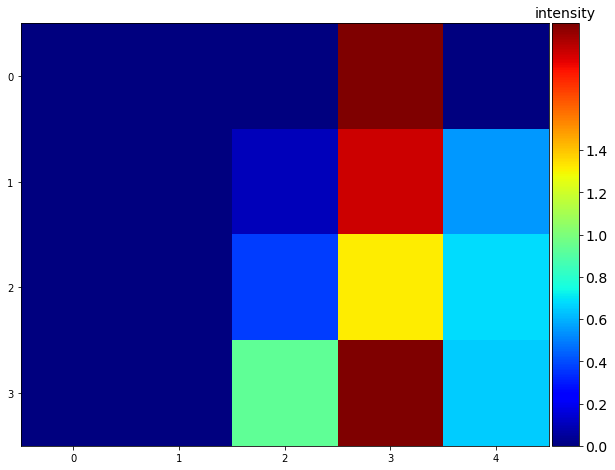

In [12]:
fig6 = plt.figure(figsize=(10,10))
gs6 = gridspec.GridSpec(nrows=1, ncols=1)

fig6_ax1 = fig6.add_subplot(gs6[0,0])
fig6_ax1.set_xticks(np.arange(0, 5, 1))
fig6_ax1.set_yticks(np.arange(0, 12, 1))
# fig6_ax1.grid(color='w', linewidth=2)
# fig6_ax1.set_xticks(np.arange(0, image_size, 1))
# fig6_ax1.set_yticks(np.arange(0, image_size, 1))
pos = fig6_ax1.imshow(data[:,0,:], cmap='jet', vmin=0, vmax=2.0, origin='upper')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')



# plt.imshow(data[:,0,:])
# plt.xlabel('position')
# plt.ylabel('angle')
# plt.show()
print(data[:,0,:])